In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
import warnings
warnings.filterwarnings("ignore")

from pylab import rcParams


%matplotlib inline

In [2]:
dftelco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
dftelco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
missing_value_row = list(dftelco[dftelco['TotalCharges'] == " "].index)
print('Missing Value Rows-->', missing_value_row , '\nTotal rows-->', len(missing_value_row))

Missing Value Rows--> [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754] 
Total rows--> 11


In [4]:
# fill = dftelco.MonthlyCharges * dftelco.tenure
# dftelco.TotalCharges.fillna(fill,inplace=True)
# dftelco.isnull().sum()

for missing_row in missing_value_row :
    dftelco['TotalCharges'][missing_row] = 0

In [5]:
print('0 Value Rows-->', missing_value_row , '\nTotal rows-->', len(missing_value_row))

zero_value_row = list(dftelco[dftelco['TotalCharges'] == 0].index)
for zero_row in zero_value_row :
    dftelco['TotalCharges'][zero_row] = dftelco['tenure'][zero_row] * dftelco['MonthlyCharges'][zero_row]

for zero_row in zero_value_row :
    print( dftelco['MonthlyCharges'][zero_row],dftelco['tenure'][zero_row],dftelco['TotalCharges'][zero_row])
# Tenure itu 0 untuk cstomers dengan TotalCharges 0,

0 Value Rows--> [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754] 
Total rows--> 11
52.55 0 0.0
20.25 0 0.0
80.85 0 0.0
25.75 0 0.0
56.05 0 0.0
19.85 0 0.0
25.35 0 0.0
20.0 0 0.0
19.7 0 0.0
73.35 0 0.0
61.9 0 0.0


In [6]:
dftelco['TotalCharges']=pd.to_numeric(dftelco['TotalCharges'])

In [7]:
dftelco[['MonthlyCharges','tenure','TotalCharges']].head()

,MonthlyCharges,tenure,TotalCharges
0,29.85,1,29.85
1,56.95,34,1889.50
2,53.85,2,108.15
3,42.30,45,1840.75
4,70.70,2,151.65


In [8]:
dftelco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [9]:
listItem = []
for col in dftelco.columns :
    listItem.append([col, dftelco[col].dtype, dftelco[col].isna().sum(), round((dftelco[col].isna().sum()/len(dftelco[col])) * 100,2),
                    dftelco[col].nunique(), list(dftelco[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,customerID,object,0,0.0,7043,"[4950-HKQTE, 1846-XWOQN]"
1,gender,object,0,0.0,2,"[Female, Male]"
2,SeniorCitizen,int64,0,0.0,2,"[1, 0]"
3,Partner,object,0,0.0,2,"[No, Yes]"
4,Dependents,object,0,0.0,2,"[Yes, No]"
5,tenure,int64,0,0.0,73,"[56, 6]"
6,PhoneService,object,0,0.0,2,"[Yes, No]"
7,MultipleLines,object,0,0.0,3,"[Yes, No phone service]"
8,InternetService,object,0,0.0,3,"[DSL, Fiber optic]"
9,OnlineSecurity,object,0,0.0,3,"[No, No internet service]"


In [10]:
dftelco.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Exploratory Data Analysis

In [11]:
dftelco.drop(['customerID'], axis=1, inplace=True)

In [12]:
#Target feature
dftelco['Churn'].value_counts(sort=False)

Yes    1869
No     5174
Name: Churn, dtype: int64

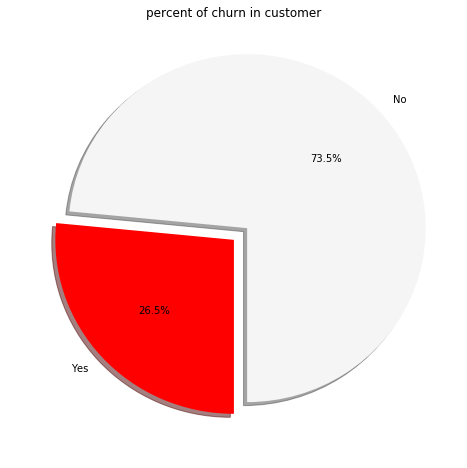

In [13]:
#data to plot
labels = dftelco['Churn'].value_counts(sort = True).index
sizes = dftelco['Churn'].value_counts(sort = True)

colors = ["whitesmoke","red"]
explode = (0.1,0)

rcParams['figure.figsize'] = 8,8
#plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('percent of churn in customer')
plt.show()

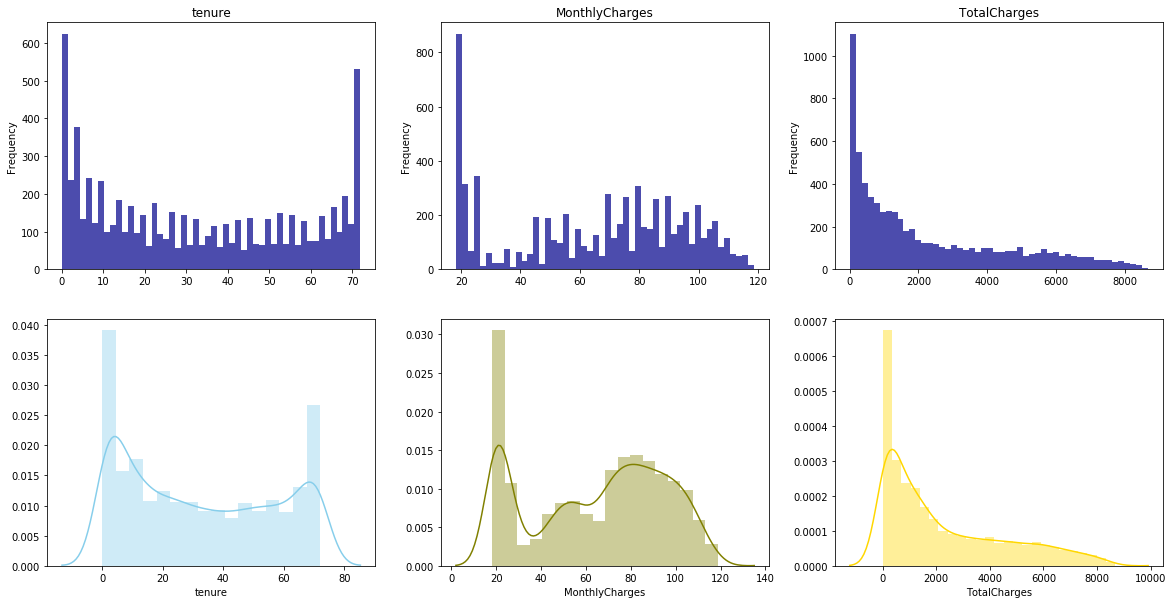

In [14]:
# print('Univariate Analysis of each numerical Variables')
f, axes = plt.subplots(2, 3, figsize=(20,10))
#Charting the histogram
dftelco["tenure"].plot.hist(color='DarkBlue', alpha=0.7, bins=50, title='tenure',ax=axes[0, 0])
dftelco["MonthlyCharges"].plot.hist(color='DarkBlue', alpha=0.7, bins=50, title='MonthlyCharges',ax=axes[0, 1])
dftelco["TotalCharges"].plot.hist(color='DarkBlue', alpha=0.7, bins=50, title='TotalCharges',ax=axes[0, 2])

#Charting the density plot
sns.distplot( dftelco["tenure"] , kde=True, rug=False, color="skyblue", ax=axes[1, 0])
sns.distplot( dftelco["MonthlyCharges"] , kde=True, rug=False, color="olive", ax=axes[1, 1])
sns.distplot( dftelco["TotalCharges"] , kde=True, rug=False, color="gold", ax=axes[1, 2])

In [15]:
dftelco['Churn'] = dftelco['Churn'].map(lambda s :1  if s =='Yes' else 0)

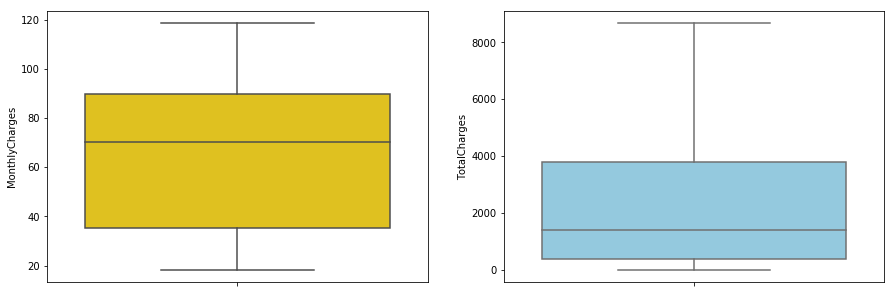

In [16]:
# Let's Check for Outliers using Box Plot for Tenure, MonthlyCharges, TotalCharges
f, axes = plt.subplots(1, 2, figsize=(15,5))
# sns.boxplot(x=dftelco["tenure"], orient="v", color="olive",ax=axes[0])
sns.boxplot(x=dftelco["MonthlyCharges"], orient="v", color="gold",ax=axes[0])
sns.boxplot(x=dftelco["TotalCharges"] , orient="v", color="skyblue",ax=axes[1])

## one hot encoding , label encoder

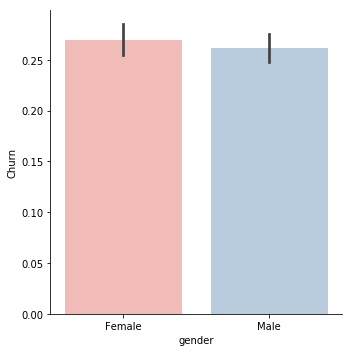

In [17]:
#create new binary columns.

g = sns.factorplot(y="Churn",x="gender",data=dftelco,kind="bar" ,palette = "Pastel1")

In [18]:
dftelco = pd.get_dummies(data=dftelco, columns=['gender'])

In [19]:
dftelco['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [20]:
dftelco['Partner'] = dftelco['Partner'].map(lambda s :1  if s =='Yes' else 0)
dftelco['Partner'].value_counts()

0    3641
1    3402
Name: Partner, dtype: int64

In [21]:
dftelco['Dependents'] = dftelco['Dependents'].map(lambda s :1  if s =='Yes' else 0)
dftelco['PhoneService'] = dftelco['PhoneService'].map(lambda s :1  if s =='Yes' else 0)
dftelco['PaperlessBilling'] = dftelco['PaperlessBilling'].map(lambda s :1  if s =='Yes' else 0)

In [22]:
dftelco['MultipleLines'].value_counts()


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [23]:
dftelco['MultipleLines'].replace('No phone service','No', inplace=True)
dftelco['MultipleLines'] = dftelco['MultipleLines'].map(lambda s :1  if s =='Yes' else 0)
dftelco['MultipleLines'].value_counts()

0    4072
1    2971
Name: MultipleLines, dtype: int64

In [24]:
dftelco['OnlineSecurity'] = dftelco['OnlineSecurity'].map(lambda s :1  if s =='Yes' else 0)
dftelco['OnlineBackup'] = dftelco['OnlineBackup'].map(lambda s :1  if s =='Yes' else 0)
dftelco['DeviceProtection'] = dftelco['DeviceProtection'].map(lambda s :1  if s =='Yes' else 0)
dftelco['TechSupport'] = dftelco['TechSupport'].map(lambda s :1  if s =='Yes' else 0)
dftelco['StreamingTV'] = dftelco['StreamingTV'].map(lambda s :1  if s =='Yes' else 0)
dftelco['StreamingMovies'] = dftelco['StreamingMovies'].map(lambda s :1  if s =='Yes' else 0)

In [25]:
dftelco.loc[(dftelco.Churn == 1),'PaymentMethod'].value_counts(normalize = True)
#yang paling banyak churn electronic check

Electronic check             0.573034
Mailed check                 0.164794
Bank transfer (automatic)    0.138042
Credit card (automatic)      0.124131
Name: PaymentMethod, dtype: float64

In [26]:
dftelco.loc[(dftelco.Churn == 1),'PaperlessBilling'].value_counts(normalize = True)
#yang paling banyak churn yg pakai paperlessbilling

1    0.749064
0    0.250936
Name: PaperlessBilling, dtype: float64

In [27]:
# This is categorical feature, I will use pandas function "get_dummies" for this feature

dftelco = pd.get_dummies(data=dftelco, columns=['PaymentMethod'])

In [28]:
dftelco[['PaymentMethod_Electronic check',
      'PaymentMethod_Mailed check',
      'PaymentMethod_Bank transfer (automatic)',
      'PaymentMethod_Credit card (automatic)']].head()

,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic)
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,1,0,0,0


In [29]:
# this is also categorical value, let "get_dummies" it
dftelco['Contract'].value_counts()


Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [30]:
dftelco = pd.get_dummies(data=dftelco, columns=['Contract'])

## Feature engineering

In [31]:
dftelco['InternetService'].value_counts()


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [32]:
dftelco['Has_InternetService'] = dftelco['InternetService'].map(lambda s :0  if s =='No' else 1)
dftelco['Fiber_optic'] = dftelco['InternetService'].map(lambda s :1  if s =='Fiber optic' else 0)
dftelco['DSL'] = dftelco['InternetService'].map(lambda s :1  if s =='DSL' else 0)

In [33]:
print(dftelco['Has_InternetService'].value_counts())
print(dftelco['Fiber_optic'].value_counts())
print(dftelco['DSL'].value_counts())
dftelco.drop(['InternetService'], axis=1, inplace=True)

1    5517
0    1526
Name: Has_InternetService, dtype: int64
0    3947
1    3096
Name: Fiber_optic, dtype: int64
0    4622
1    2421
Name: DSL, dtype: int64


### Now Let's Plot variables with respect to Our Target Variable

Text(0.5,0,'Churn')

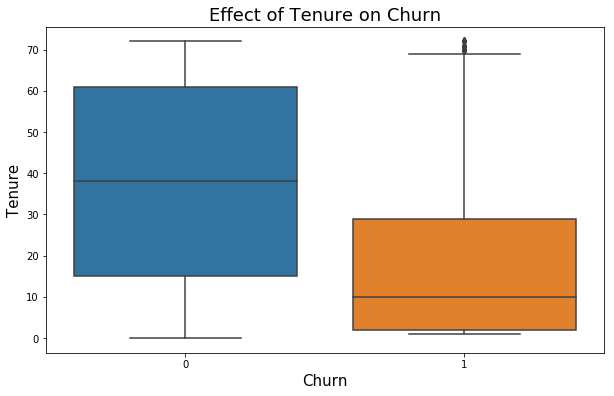

In [34]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x='Churn', y = 'tenure', data=dftelco)
ax.set_title('Effect of Tenure on Churn', fontsize=18)
ax.set_ylabel('Tenure', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)

# Company must put some extra focus on new customers having tenure over 10 months.

Churn                       0     1   All
Contract_Month-to-month                  
0                        2954   214  3168
1                        2220  1655  3875
All                      5174  1869  7043
Churn                 0     1   All
Contract_One year                  
0                  3867  1703  5570
1                  1307   166  1473
All                5174  1869  7043
Churn                 0     1   All
Contract_Two year                  
0                  3527  1821  5348
1                  1647    48  1695
All                5174  1869  7043
Percent of Month-to-Month Contract People that Left the Company 88.55002675227395
Percent of One-Year Contract People that Left the Company 8.881754949170679
Percent of Two-Year Contract People that Left the Company 2.568218298555377


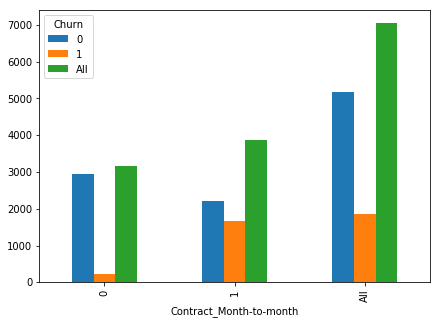

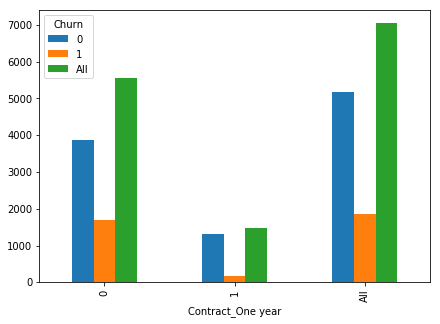

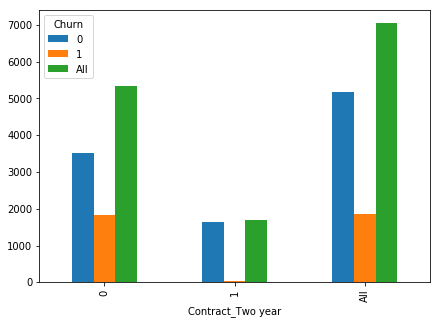

In [35]:
# Now Let's Start Comparing.
# contract month to month Vs Churn
print(pd.crosstab(dftelco['Contract_Month-to-month'],dftelco['Churn'],margins=True))
pd.crosstab(dftelco['Contract_Month-to-month'],dftelco['Churn'],margins=True).plot(kind='bar',figsize=(7,5));

print(pd.crosstab(dftelco['Contract_One year'],dftelco['Churn'],margins=True))
pd.crosstab(dftelco['Contract_One year'],dftelco['Churn'],margins=True).plot(kind='bar',figsize=(7,5));

print(pd.crosstab(dftelco['Contract_Two year'],dftelco['Churn'],margins=True))
pd.crosstab(dftelco['Contract_Two year'],dftelco['Churn'],margins=True).plot(kind='bar',figsize=(7,5));

print('Percent of Month-to-Month Contract People that Left the Company {0}'.format((1655/1869)*100))
print('Percent of One-Year Contract People that Left the Company {0}'.format((166/1869)*100)) 
print('Percent of Two-Year Contract People that Left the Company {0}'.format((48/1869)*100))     

# Most of the People that Left were the Ones who had Month-to-Month Contract.

Churn             0     1   All
gender_Female                  
0              2625   930  3555
1              2549   939  3488
All            5174  1869  7043
Churn           0     1   All
gender_Male                  
0            2549   939  3488
1            2625   930  3555
All          5174  1869  7043
Percent of Females that Left the Company 50.24077046548957
Percent of Males that Left the Company 49.75922953451043


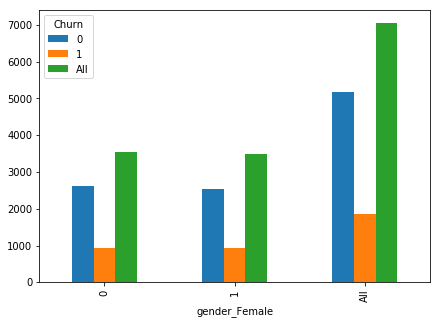

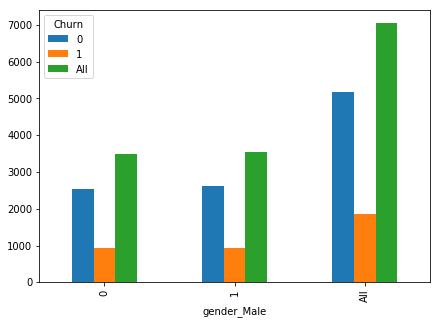

In [36]:
# Gender Vs Churn
print(pd.crosstab(dftelco['gender_Female'],dftelco['Churn'],margins=True))
pd.crosstab(dftelco['gender_Female'],dftelco['Churn'],margins=True).plot(kind='bar',figsize=(7,5));

print(pd.crosstab(dftelco['gender_Male'],dftelco['Churn'],margins=True))
pd.crosstab(dftelco['gender_Male'],dftelco['Churn'],margins=True).plot(kind='bar',figsize=(7,5));

print('Percent of Females that Left the Company {0}'.format((939/1869)*100))
print('Percent of Males that Left the Company {0}'.format((930/1869)*100)) 



Churn           0     1   All
Fiber_optic                  
0            3375   572  3947
1            1799  1297  3096
All          5174  1869  7043
Churn     0     1   All
DSL                    
0      3212  1410  4622
1      1962   459  2421
All    5174  1869  7043
Percent of DSL Internet-Service People that Left the Company 24.558587479935795
Percent of Fiber Optic Internet-Service People that Left the Company 69.39539860888175


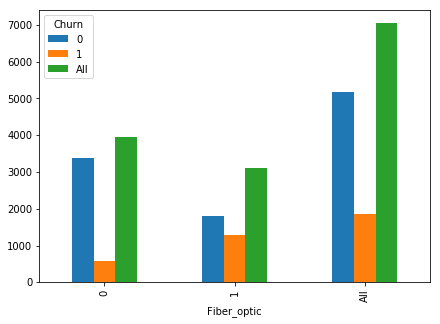

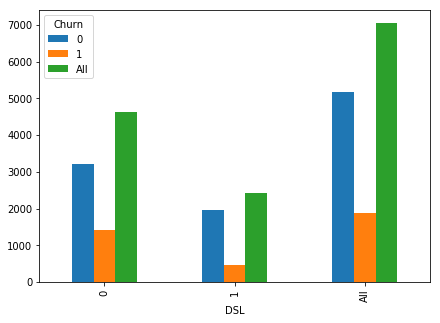

In [37]:
# fiber optic , DSL Vs Churn
# print(pd.crosstab(dftelco['Has_InternetService'],dftelco['Churn'],margins=True))
# pd.crosstab(dftelco['Has_InternetService'],dftelco['Churn'],margins=True).plot(kind='bar',figsize=(7,5));

print(pd.crosstab(dftelco['Fiber_optic'],dftelco['Churn'],margins=True))
pd.crosstab(dftelco['Fiber_optic'],dftelco['Churn'],margins=True).plot(kind='bar',figsize=(7,5));

print(pd.crosstab(dftelco['DSL'],dftelco['Churn'],margins=True))
pd.crosstab(dftelco['DSL'],dftelco['Churn'],margins=True).plot(kind='bar',figsize=(7,5));

print('Percent of DSL Internet-Service People that Left the Company {0}'.format((459/1869)*100))
print('Percent of Fiber Optic Internet-Service People that Left the Company {0}'.format((1297/1869)*100)) 
# print('Percent of No Internet-Service People that Left the Company {0}'.format((113/1869)*100))    



Dependents     0     1   All
Partner                     
0           3280   361  3641
1           1653  1749  3402
All         4933  2110  7043
Percent of Partner that had Dependents 82.8909952606635
Percent of Non-Partner that had Dependents 17.10900473933649


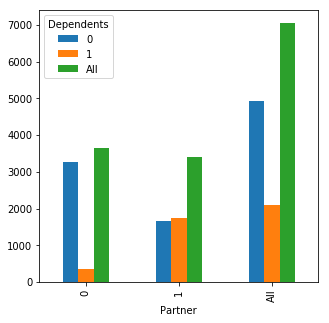

In [38]:
# Partner Vs Dependents
print(pd.crosstab(dftelco.Partner,dftelco.Dependents,margins=True))
pd.crosstab(dftelco.Partner,dftelco.Dependents,margins=True).plot(kind='bar',figsize=(5,5));

print('Percent of Partner that had Dependents {0}'.format((1749/2110)*100))
print('Percent of Non-Partner that had Dependents {0}'.format((361/2110)*100))    


Churn       0     1   All
Partner                  
0        2441  1200  3641
1        2733   669  3402
All      5174  1869  7043
Percent of customers who have a partner that Left the Company 35.79454253611557
Percent of customers Non partner People that Left the Company 64.20545746388443


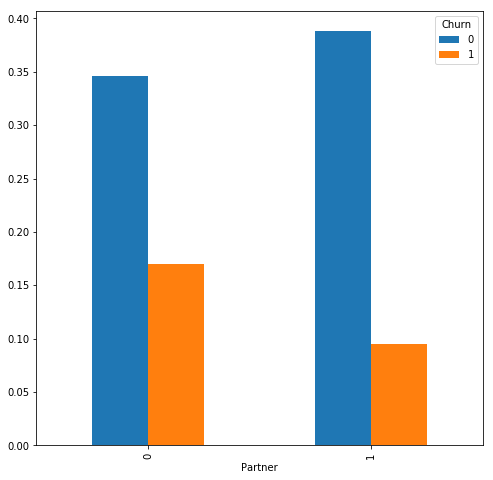

In [39]:
# Partner Vs Churn
print(pd.crosstab(dftelco.Partner,dftelco.Churn,margins=True))
pd.crosstab(dftelco.Partner,dftelco.Churn,normalize=True).plot(kind='bar');

print('Percent of customers who have a partner that Left the Company {0}'.format((669/1869)*100))
print('Percent of customers Non partner People that Left the Company {0}'.format((1200/1869)*100)) 

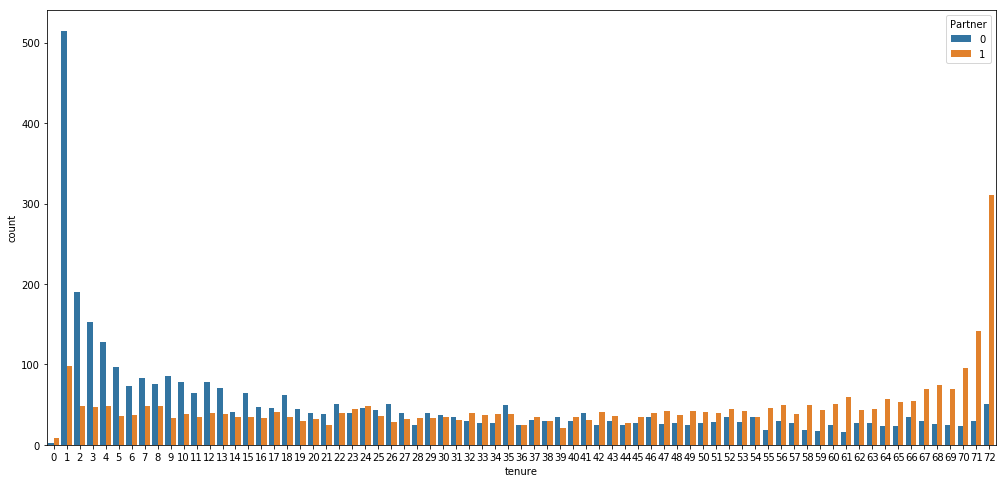

In [40]:
plt.figure(figsize=(17,8))
sns.countplot(x=dftelco['tenure'],hue=dftelco.Partner);

Churn             0     1   All
SeniorCitizen                  
0              4508  1393  5901
1               666   476  1142
All            5174  1869  7043
Percent of customers senior citizen that Left the Company 25.468164794007492
Percent of customers Non senior citizen that Left the Company 74.53183520599251


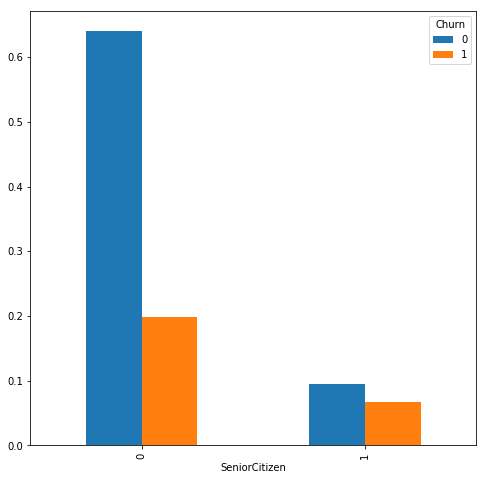

In [41]:
# Senior Citizen Vs Churn
print(pd.crosstab(dftelco.SeniorCitizen,dftelco.Churn,margins=True))
pd.crosstab(dftelco.SeniorCitizen,dftelco.Churn,normalize=True).plot(kind='bar');

print('Percent of customers senior citizen that Left the Company {0}'.format((476/1869)*100))
print('Percent of customers Non senior citizen that Left the Company {0}'.format((1393/1869)*100)) 

Churn            0     1   All
PhoneService                  
0              512   170   682
1             4662  1699  6361
All           5174  1869  7043
Percent of customer that had phoneservice to churn 90.90422685928304
Percent of customer no phoneservice to churn 9.095773140716961


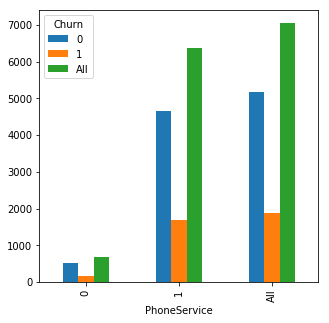

In [42]:
# PhoneService vs churn
print(pd.crosstab(dftelco.PhoneService,dftelco.Churn,margins=True))
pd.crosstab(dftelco.PhoneService,dftelco.Churn,margins=True).plot(kind='bar',figsize=(5,5));

print('Percent of customer that had phoneservice to churn {0}'.format((1699/1869)*100))
print('Percent of customer no phoneservice to churn {0}'.format((170/1869)*100))

Churn              0     1   All
OnlineSecurity                  
0               3450  1574  5024
1               1724   295  2019
All             5174  1869  7043
Percent of customer that had OnlineSecurity to churn 15.783841626538257
Percent of customer no having OnlineSecurity to churn 84.21615837346175


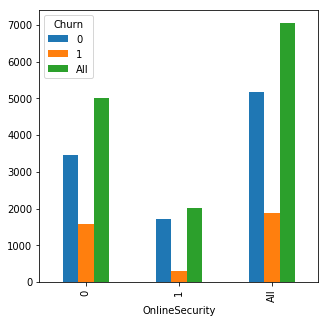

In [43]:
# g = sns.factorplot(y="OnlineSecurity",x="Churn",data=dftelco,kind="bar" ,palette = "Pastel1")

print(pd.crosstab(dftelco.OnlineSecurity,dftelco.Churn,margins=True))
pd.crosstab(dftelco.OnlineSecurity,dftelco.Churn,margins=True).plot(kind='bar',figsize=(5,5));

print('Percent of customer that had OnlineSecurity to churn {0}'.format((295/1869)*100))
print('Percent of customer no having OnlineSecurity to churn {0}'.format((1574  /1869)*100))

Churn           0     1   All
StreamingTV                  
0            3281  1055  4336
1            1893   814  2707
All          5174  1869  7043
Churn               0     1   All
StreamingMovies                  
0                3260  1051  4311
1                1914   818  2732
All              5174  1869  7043
Percent of Churn ratio for people having StreamingTV service 43.55270197966827
Percent of Churn ratio for people no having StreamingTV service 56.44729802033173
Percent of Churn ratio for people having StreamingMovies service 43.76672017121455
Percent of Churn ratio for people no having StreamingMovies service 56.23327982878544


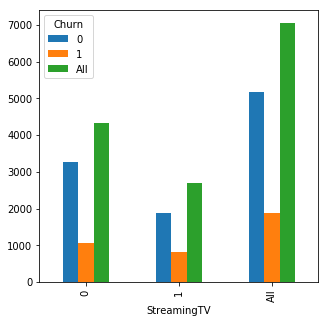

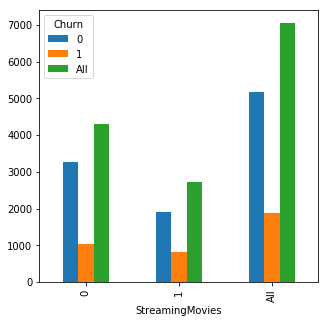

In [44]:
# StreamingTV vs churn
print(pd.crosstab(dftelco.StreamingTV,dftelco.Churn,margins=True))
pd.crosstab(dftelco.StreamingTV,dftelco.Churn,margins=True).plot(kind='bar',figsize=(5,5));

# Streamingmovie vs churn
print(pd.crosstab(dftelco.StreamingMovies,dftelco.Churn,margins=True))
pd.crosstab(dftelco.StreamingMovies,dftelco.Churn,margins=True).plot(kind='bar',figsize=(5,5));

print('Percent of Churn ratio for people having StreamingTV service {0}'.format((814/1869)*100))
print('Percent of Churn ratio for people no having StreamingTV service {0}'.format((1055/1869)*100))
print('Percent of Churn ratio for people having StreamingMovies service {0}'.format((818/1869)*100))
print('Percent of Churn ratio for people no having StreamingMovies service {0}'.format((1051/1869)*100))

Churn           0     1   All
TechSupport                  
0            3440  1559  4999
1            1734   310  2044
All          5174  1869  7043
Percent of Churn ratio for customer having TechSupport 16.586409844836812
Percent of Churn ratio for customer not having TechSupport 83.41359015516319


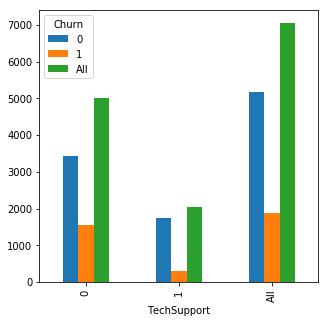

In [45]:
#Tech support vs Churn
print(pd.crosstab(dftelco.TechSupport,dftelco.Churn,margins=True))
pd.crosstab(dftelco.TechSupport,dftelco.Churn,margins=True).plot(kind='bar',figsize=(5,5));

print('Percent of Churn ratio for customer having TechSupport {0}'.format((310/1869)*100))
print('Percent of Churn ratio for customer not having TechSupport {0}'.format((1559/1869)*100))



Churn                0     1   All
DeviceProtection                  
0                 3297  1324  4621
1                 1877   545  2422
All               5174  1869  7043
Percent of Churn ratio for customer having DeviceProtection 29.159978598180846
Percent of Churn ratio for customer not having DeviceProtection 70.84002140181916


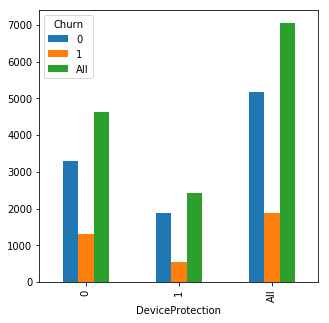

In [46]:
#DeviceProtection vs churn 

print(pd.crosstab(dftelco.DeviceProtection,dftelco.Churn,margins=True))
pd.crosstab(dftelco.DeviceProtection,dftelco.Churn,margins=True).plot(kind='bar',figsize=(5,5));

print('Percent of Churn ratio for customer having DeviceProtection {0}'.format((545/1869)*100))
print('Percent of Churn ratio for customer not having DeviceProtection {0}'.format((1324/1869)*100))


Churn                              0     1   All
PaymentMethod_Electronic check                  
0                               3880   798  4678
1                               1294  1071  2365
All                             5174  1869  7043
Churn                          0     1   All
PaymentMethod_Mailed check                  
0                           3870  1561  5431
1                           1304   308  1612
All                         5174  1869  7043
Churn                                       0     1   All
PaymentMethod_Bank transfer (automatic)                  
0                                        3888  1611  5499
1                                        1286   258  1544
All                                      5174  1869  7043
Churn                                     0     1   All
PaymentMethod_Credit card (automatic)                  
0                                      3884  1637  5521
1                                      1290   232  1522
All             

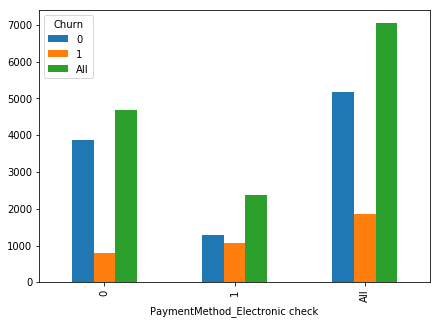

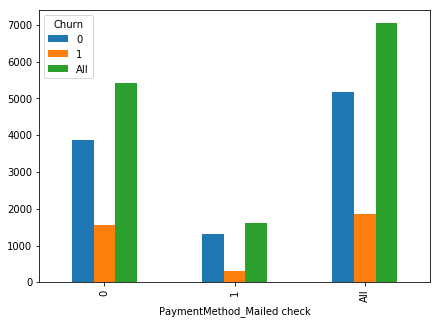

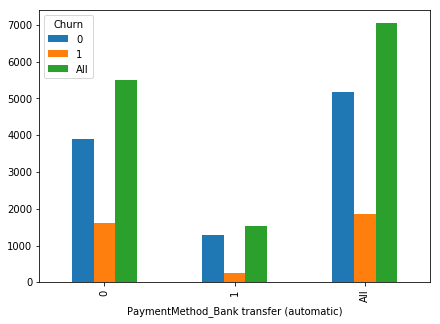

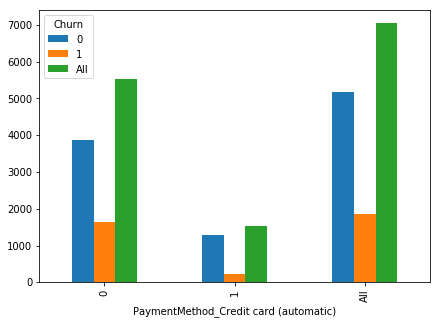

In [47]:
# PaymentMethod_Electronic check

print(pd.crosstab(dftelco['PaymentMethod_Electronic check'],dftelco['Churn'],margins=True))
pd.crosstab(dftelco['PaymentMethod_Electronic check'],dftelco['Churn'],margins=True).plot(kind='bar',figsize=(7,5));

print(pd.crosstab(dftelco['PaymentMethod_Mailed check'],dftelco['Churn'],margins=True))
pd.crosstab(dftelco['PaymentMethod_Mailed check'],dftelco['Churn'],margins=True).plot(kind='bar',figsize=(7,5));

print(pd.crosstab(dftelco['PaymentMethod_Bank transfer (automatic)'],dftelco['Churn'],margins=True))
pd.crosstab(dftelco['PaymentMethod_Bank transfer (automatic)'],dftelco['Churn'],margins=True).plot(kind='bar',figsize=(7,5));

print(pd.crosstab(dftelco['PaymentMethod_Credit card (automatic)'],dftelco['Churn'],margins=True))
pd.crosstab(dftelco['PaymentMethod_Credit card (automatic)'],dftelco['Churn'],margins=True).plot(kind='bar',figsize=(7,5));

print('Percent of Churn ratio for customer paying bills via Electronic check {0}'.format((1071/1869)*100))
print('Percent of Churn ratio for customer paying bills via Mailed check  {0}'.format((308/1869)*100))
print('Percent of Churn ratio for customer paying bills via Bank transfer  {0}'.format((258/1869)*100))
print('Percent of Churn ratio for customer paying bills via Credit card  {0}'.format((232/1869)*100))

Churn                0     1   All
PaperlessBilling                  
0                 2403   469  2872
1                 2771  1400  4171
All               5174  1869  7043
Percent of Churn ratio for customer with PaperlessBilling 74.90636704119851


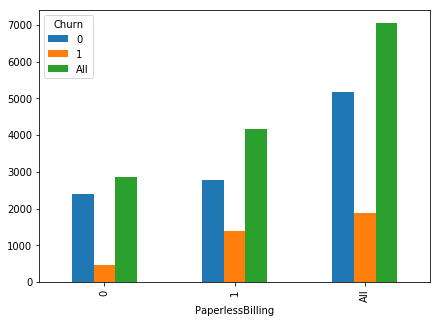

In [48]:
#paperlessbilling vs churn
print(pd.crosstab(dftelco['PaperlessBilling'],dftelco['Churn'],margins=True))
pd.crosstab(dftelco['PaperlessBilling'],dftelco['Churn'],margins=True).plot(kind='bar',figsize=(7,5));

print('Percent of Churn ratio for customer with PaperlessBilling {0}'.format((1400/1869)*100))

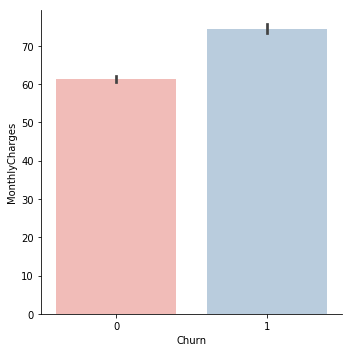

In [49]:
# g = sns.factorplot(x="Churn", y = "MonthlyCharges",data = dftelco, kind="box", palette = "Pastel1")
g = sns.factorplot(x="Churn", y = "MonthlyCharges",data = dftelco, kind="bar", palette = "Pastel1")



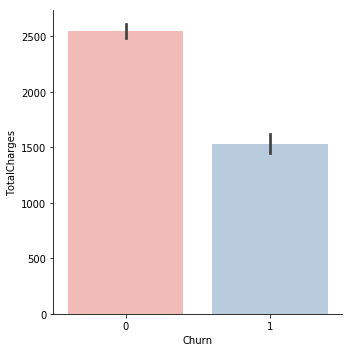

In [50]:
g = sns.factorplot(y="TotalCharges",x="Churn",data=dftelco,kind="bar" ,palette = "Pastel1")

# In range of 2500 to 8000, population of loyalty customer is around twice as amount as churn customer.

Churn             0     1   All
MultipleLines                  
0              3053  1019  4072
1              2121   850  2971
All            5174  1869  7043
Percent of Churn ratio for customer with MultipleLines 45.4788657035848
Percent of Churn ratio for customer without MultipleLines 54.5211342964152


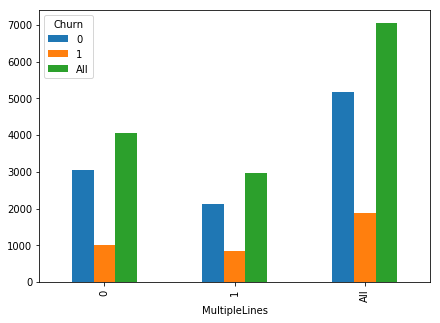

In [51]:
print(pd.crosstab(dftelco['MultipleLines'],dftelco['Churn'],margins=True))
pd.crosstab(dftelco['MultipleLines'],dftelco['Churn'],margins=True).plot(kind='bar',figsize=(7,5));

print('Percent of Churn ratio for customer with MultipleLines {0}'.format((850/1869)*100))
print('Percent of Churn ratio for customer without MultipleLines {0}'.format((1019/1869)*100))

In [52]:
# dftelco[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
#                                                               y='TotalCharges')

In [53]:
dftelco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
SeniorCitizen                              7043 non-null int64
Partner                                    7043 non-null int64
Dependents                                 7043 non-null int64
tenure                                     7043 non-null int64
PhoneService                               7043 non-null int64
MultipleLines                              7043 non-null int64
OnlineSecurity                             7043 non-null int64
OnlineBackup                               7043 non-null int64
DeviceProtection                           7043 non-null int64
TechSupport                                7043 non-null int64
StreamingTV                                7043 non-null int64
StreamingMovies                            7043 non-null int64
PaperlessBilling                           7043 non-null int64
MonthlyCharges                             7043 non-null float64
TotalChar

In [54]:
dftelco.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,Has_InternetService,Fiber_optic,DSL
0,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,1
1,0,0,0,34,1,0,1,0,1,0,...,0,0,0,1,0,1,0,1,0,1
2,0,0,0,2,1,0,1,1,0,0,...,0,0,0,1,1,0,0,1,0,1
3,0,0,0,45,0,0,1,0,1,1,...,1,0,0,0,0,1,0,1,0,1
4,0,0,0,2,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0


## import file test

In [55]:
data =dftelco.drop(['Churn'],axis=1)
target =dftelco['Churn']

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target,
                                                    test_size=0.30, 
                                                    random_state=101)

In [57]:
from sklearn.metrics import classification_report, matthews_corrcoef, roc_auc_score, confusion_matrix, accuracy_score, roc_curve, auc

## CreatingModel & Evaluate

## SMOTE

In [58]:
from imblearn.over_sampling import RandomOverSampler,SMOTE

In [59]:
y_train.value_counts()

0    3628
1    1302
Name: Churn, dtype: int64

In [60]:
smot = SMOTE(random_state=101)

In [61]:
X_smot,y_smot = smot.fit_sample(X_train, y_train)

In [62]:
pd.Series(y_smot).value_counts()

1    3628
0    3628
dtype: int64

## Oversampling

In [63]:
ros = RandomOverSampler(random_state=101)

In [64]:
X_ros,y_ros = ros.fit_sample(X_train, y_train)

In [65]:
# rfc.fit(X_ros,y_ros)

In [66]:
pd.Series(y_train).value_counts()

0    3628
1    1302
Name: Churn, dtype: int64

In [67]:
pd.Series(y_ros).value_counts()

1    3628
0    3628
dtype: int64

## Gridsearch

In [68]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [69]:
# parameters = {'class_weight':({0:1, 1:5},{0:1, 1:6},{0:1, 1:7}), 
#                'min_samples_leaf': (13,12,10),
#                'min_samples_split': (30,28,27)} 
# # bisa(20,15,17)
# # rfc = RandomForestClassifier(n_estimators=100,random_state=101) 
# classifier = XGBClassifier()   
# dt = GridSearchCV(rfc,parameters,
#                   scoring=['roc_auc','precision'],
#                   refit='precision',cv=5)
# dt.fit(X_train, y_train)
# dt.best_estimator_

## Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rfc = RandomForestClassifier(n_estimators=100)


In [72]:
rfc.fit(X_ros,y_ros)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [73]:
from sklearn.metrics import classification_report,matthews_corrcoef,roc_auc_score,confusion_matrix,accuracy_score,roc_curve,auc

In [74]:
predict= rfc.predict(X_test)
predictProb=rfc.predict_proba(X_test)

In [75]:
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))
print('ROC AUC Score =' +str(roc_auc_score(y_test,predictProb[:,1])))
print('Accuracy :',accuracy_score(y_test,predict))
print('Matthews Corr_coef :',matthews_corrcoef(y_test,predict))

[[1310  236]
 [ 253  314]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1546
           1       0.57      0.55      0.56       567

   micro avg       0.77      0.77      0.77      2113
   macro avg       0.70      0.70      0.70      2113
weighted avg       0.77      0.77      0.77      2113

ROC AUC Score =0.8133922439657669
Accuracy : 0.7685754850922859
Matthews Corr_coef : 0.40507112192753275


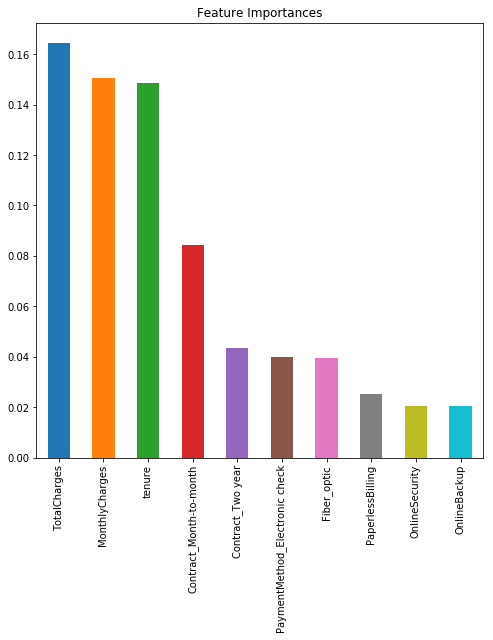

In [76]:
coef1 = pd.Series(rfc.feature_importances_, X_train.columns).sort_values(ascending = False).head(10)
coef1.plot(kind='bar', title='Feature Importances')

## Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
logmodel = LogisticRegression()
logmodel.fit(X_ros,y_ros)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [79]:
predictions = logmodel.predict(X_test)

In [80]:
from sklearn.metrics import classification_report

In [81]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1546
           1       0.52      0.80      0.63       567

   micro avg       0.75      0.75      0.75      2113
   macro avg       0.72      0.77      0.72      2113
weighted avg       0.80      0.75      0.76      2113



## Gradien Boosting

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [83]:
trainpredict = gbc.predict(X_train)
trainpredictProb = gbc.predict_proba(X_train)

In [84]:
print(confusion_matrix(y_train, trainpredict))
print(classification_report(y_train, trainpredict))
print('ROC AUC :', roc_auc_score(y_train, trainpredictProb[:,1]))


[[3325  303]
 [ 545  757]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3628
           1       0.71      0.58      0.64      1302

   micro avg       0.83      0.83      0.83      4930
   macro avg       0.79      0.75      0.76      4930
weighted avg       0.82      0.83      0.82      4930

ROC AUC : 0.883591544346159


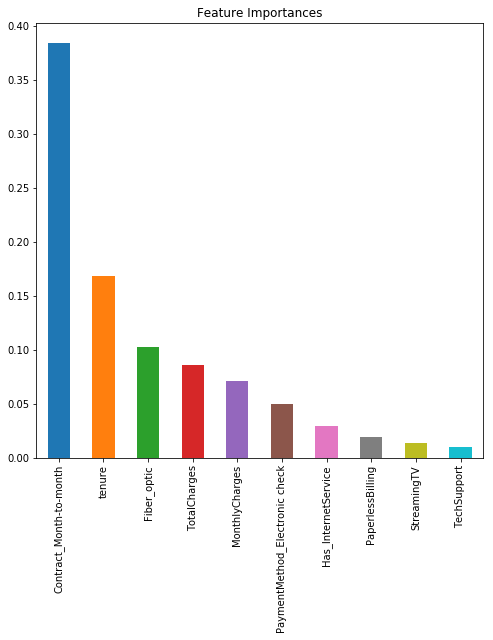

In [85]:
coef1 = pd.Series(gbc.feature_importances_, data.columns).sort_values(ascending = False).head(10)
coef1.plot(kind='bar', title='Feature Importances')

## XGboost

In [86]:
xRosDf = pd.DataFrame(columns=X_train.columns, data=X_ros)
xRosDf['y_ros'] = y_ros
xRosDf.head(2)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,Has_InternetService,Fiber_optic,DSL,y_ros
0,0.0,1.0,0.0,39.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,1.0,1.0,0.0,60.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0


In [87]:
from xgboost import XGBClassifier

In [88]:
xgbModel = XGBClassifier(random_state=101, n_estimators=100, learning_rate=0.1,max_depth=1)
xgbModel.fit(xRosDf.drop('y_ros', axis=1),xRosDf['y_ros'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=1, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=101, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [89]:
predict_test = xgbModel.predict(X_test)
predictProb_test = xgbModel.predict_proba(X_test)

In [90]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))
print('ROC AUC:', roc_auc_score(y_test, predictProb_test[:,1]))
print('Accuracy:', accuracy_score(y_test, predict_test))
print('Matthews Corr_coef:', matthews_corrcoef(y_test, predict_test))

[[1113  433]
 [  95  472]]
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1546
           1       0.52      0.83      0.64       567

   micro avg       0.75      0.75      0.75      2113
   macro avg       0.72      0.78      0.72      2113
weighted avg       0.81      0.75      0.76      2113

ROC AUC: 0.8504378369622008
Accuracy: 0.7501183151916706
Matthews Corr_coef: 0.49461997487685233


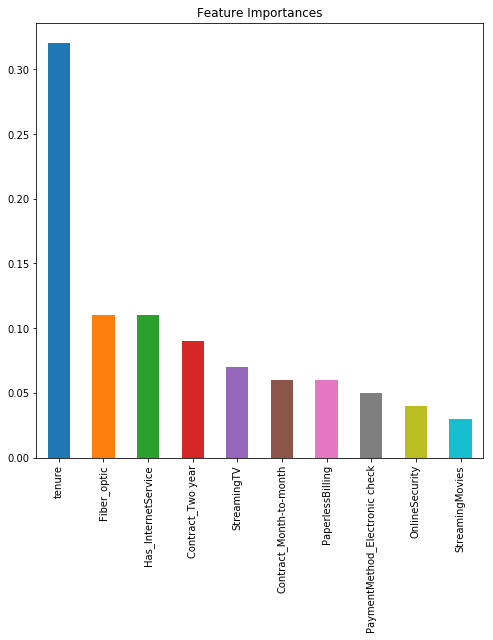

In [91]:
coef1 = pd.Series(xgbModel.feature_importances_, data.columns).sort_values(ascending = False).head(10)
coef1.plot(kind='bar', title='Feature Importances')

### cek data train

In [92]:
predict_train = xgbModel.predict(X_train)
predictProb_train = xgbModel.predict_proba(X_train)

In [93]:
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))
print('ROC AUC:', roc_auc_score(y_train, predictProb_train[:,1]))
print('Accuracy:', accuracy_score(y_train, predict_train))
print('Matthews Corr_coef:', matthews_corrcoef(y_train, predict_train))

[[2573 1055]
 [ 223 1079]]
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      3628
           1       0.51      0.83      0.63      1302

   micro avg       0.74      0.74      0.74      4930
   macro avg       0.71      0.77      0.71      4930
weighted avg       0.81      0.74      0.76      4930

ROC AUC: 0.8485864550678542
Accuracy: 0.7407707910750507
Matthews Corr_coef: 0.47863018543645197


## K Fold

In [94]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [95]:
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, accuracy_score, roc_curve,auc, matthews_corrcoef, f1_score
# from sklearn.ensemble import GradientBoostingClassifier


In [96]:
def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    matt = matthews_corrcoef(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    report = classification_report(y_train, predictions)
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    acc = accuracy_score(y_train, predictions)
    confMatrix = confusion_matrix(y_train, predictions)
    return {'report': report, 'matthew': matt, 'f1': f1, 'roc': roc_auc, 'accuracy': acc, 'confusion': confMatrix}

def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    matt = matthews_corrcoef(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    report = classification_report(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    acc = accuracy_score(y_test, predictions)
    confMatrix = confusion_matrix(y_test, predictions)
    return {'report': report, 'matthew': matt, 'f1': f1, 'roc': roc_auc, 'accuracy': acc, 'confusion': confMatrix}

def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [97]:
train_errors = []
validation_errors = []

for train_index, val_index in kf.split(data, target):
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    ros = RandomOverSampler(random_state=42)
    X_ros,y_ros = ros.fit_sample(X_train,y_train)
    X_ros = pd.DataFrame(X_ros,columns=X_train.columns)
    xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=1, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=101, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
    
    train_error, val_error = calc_metrics(X_ros, y_ros, X_val, y_val, xgb)
    
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [98]:
dfEval = []
for tr,val in zip(train_errors, validation_errors):
    dfEval.append([tr['accuracy'], val['accuracy'], tr['roc'], val['roc'], tr['f1'], val['f1'],
                  tr['matthew'], val['matthew']])

dfEval = pd.DataFrame(dfEval, columns=['Train Accuracy','Test Accuracy','Train ROC AUC','Test ROC AUC',
                                       'Train F1 Score','Test F1 Score','Train Matthews Corr Coef',
                                       'Test Matthews Corr Coef'])
dfEval

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Matthews Corr Coef,Test Matthews Corr Coef
0,0.762687,0.745209,0.846520,0.860665,0.761984,0.721890,0.528509,0.500849
1,0.762618,0.740951,0.845827,0.860462,0.761982,0.716473,0.528064,0.484358
2,0.775945,0.737402,0.855499,0.830981,0.775080,0.711660,0.556183,0.461977
3,0.772332,0.745739,0.854499,0.835995,0.771729,0.717381,0.547568,0.473894
4,0.774381,0.734375,0.851074,0.840298,0.773452,0.700423,0.553321,0.444643


In [99]:
for tr_err in train_errors:
    print(tr_err['report'])

              precision    recall  f1-score   support

           0       0.79      0.71      0.75      4138
           1       0.74      0.82      0.77      4138

   micro avg       0.76      0.76      0.76      8276
   macro avg       0.77      0.76      0.76      8276
weighted avg       0.77      0.76      0.76      8276

              precision    recall  f1-score   support

           0       0.79      0.71      0.75      4141
           1       0.74      0.81      0.77      4141

   micro avg       0.76      0.76      0.76      8282
   macro avg       0.77      0.76      0.76      8282
weighted avg       0.77      0.76      0.76      8282

              precision    recall  f1-score   support

           0       0.82      0.71      0.76      4153
           1       0.75      0.84      0.79      4153

   micro avg       0.78      0.78      0.78      8306
   macro avg       0.78      0.78      0.78      8306
weighted avg       0.78      0.78      0.78      8306

              preci

In [100]:
for tr_err in validation_errors:
    print(tr_err['report'])

              precision    recall  f1-score   support

           0       0.93      0.70      0.80      1036
           1       0.51      0.86      0.64       373

   micro avg       0.75      0.75      0.75      1409
   macro avg       0.72      0.78      0.72      1409
weighted avg       0.82      0.75      0.76      1409

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1033
           1       0.51      0.84      0.63       376

   micro avg       0.74      0.74      0.74      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.74      0.76      1409

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1021
           1       0.52      0.80      0.63       388

   micro avg       0.74      0.74      0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409

              preci

## Pipeline

In [101]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [102]:
ct = ColumnTransformer([('OneHot',OneHotEncoder(),np.arange(1,23)),],remainder='passthrough')

In [103]:
dfbefore = pd.read_csv('churn.csv')

In [104]:
dfbefore.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [105]:
#yang gamau di onehot dan mau di one hot
dfnew = dfbefore[['Partner','Dependents','tenure','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','MonthlyCharges','TotalCharges','Churn','gender','InternetService','Contract','PaymentMethod']]

In [106]:
dfnew.head()

,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,InternetService,Contract,PaymentMethod
0,Yes,No,1,No,No phone service,No,Yes,No,No,No,No,Yes,29.85,29.85,No,Female,DSL,Month-to-month,Electronic check
1,No,No,34,Yes,No,Yes,No,Yes,No,No,No,No,56.95,1889.5,No,Male,DSL,One year,Mailed check
2,No,No,2,Yes,No,Yes,Yes,No,No,No,No,Yes,53.85,108.15,Yes,Male,DSL,Month-to-month,Mailed check
3,No,No,45,No,No phone service,Yes,No,Yes,Yes,No,No,No,42.30,1840.75,No,Male,DSL,One year,Bank transfer (automatic)
4,No,No,2,Yes,No,No,No,No,No,No,No,Yes,70.70,151.65,Yes,Female,Fiber optic,Month-to-month,Electronic check


In [107]:
dfnew['MultipleLines'].replace('No phone service','No', inplace=True)
dfnew['MultipleLines'] = dfnew['MultipleLines'].map(lambda s :1  if s =='Yes' else 0)
dfnew['MultipleLines'].value_counts()

0    4072
1    2971
Name: MultipleLines, dtype: int64

In [108]:
le = LabelEncoder()
target = le.fit_transform(target)
dfnew['MultipleLines'] = le.fit_transform(dfnew['MultipleLines'])
dfnew['Partner'] = le.fit_transform(dfnew['Partner'])
dfnew['Dependents'] = le.fit_transform(dfnew['Dependents'])
dfnew['PhoneService'] = le.fit_transform(dfnew['PhoneService'])
dfnew['OnlineSecurity'] = le.fit_transform(dfnew['OnlineSecurity'])
dfnew['OnlineBackup'] = le.fit_transform(dfnew['OnlineBackup'])
dfnew['DeviceProtection'] = le.fit_transform(dfnew['DeviceProtection'])
dfnew['TechSupport'] = le.fit_transform(dfnew['TechSupport'])
dfnew['StreamingTV'] = le.fit_transform(dfnew['StreamingTV'])
dfnew['StreamingMovies'] = le.fit_transform(dfnew['StreamingMovies'])
dfnew['PaperlessBilling'] = le.fit_transform(dfnew['PaperlessBilling'])


In [109]:
missing_value_row = list(dfnew[dfnew['TotalCharges'] == " "].index)
print('Missing Value Rows-->', missing_value_row , '\nTotal rows-->', len(missing_value_row))
for missing_row in missing_value_row :
    dfnew['TotalCharges'][missing_row] = 0
print('0 Value Rows-->', missing_value_row , '\nTotal rows-->', len(missing_value_row))

zero_value_row = list(dftelco[dfnew['TotalCharges'] == 0].index)
for zero_row in zero_value_row :
    dfnew['TotalCharges'][zero_row] = dfnew['tenure'][zero_row] * dfnew['MonthlyCharges'][zero_row]

for zero_row in zero_value_row :
    print( dfnew['MonthlyCharges'][zero_row],dfnew['tenure'][zero_row],dfnew['TotalCharges'][zero_row])


Missing Value Rows--> [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754] 
Total rows--> 11
0 Value Rows--> [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754] 
Total rows--> 11
52.55 0 0.0
20.25 0 0.0
80.85 0 0.0
25.75 0 0.0
56.05 0 0.0
19.85 0 0.0
25.35 0 0.0
20.0 0 0.0
19.7 0 0.0
73.35 0 0.0
61.9 0 0.0


In [110]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
Partner             7043 non-null int32
Dependents          7043 non-null int32
tenure              7043 non-null int64
PhoneService        7043 non-null int32
MultipleLines       7043 non-null int64
OnlineSecurity      7043 non-null int32
OnlineBackup        7043 non-null int32
DeviceProtection    7043 non-null int32
TechSupport         7043 non-null int32
StreamingTV         7043 non-null int32
StreamingMovies     7043 non-null int32
PaperlessBilling    7043 non-null int32
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
InternetService     7043 non-null object
Contract            7043 non-null object
PaymentMethod       7043 non-null object
dtypes: float64(1), int32(10), int64(2), object(6)
memory usage: 770.4+ KB


In [111]:
dfnew.head()

,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,InternetService,Contract,PaymentMethod
0,1,0,1,0,0,0,2,0,0,0,0,1,29.85,29.85,No,Female,DSL,Month-to-month,Electronic check
1,0,0,34,1,0,2,0,2,0,0,0,0,56.95,1889.5,No,Male,DSL,One year,Mailed check
2,0,0,2,1,0,2,2,0,0,0,0,1,53.85,108.15,Yes,Male,DSL,Month-to-month,Mailed check
3,0,0,45,0,0,2,0,2,2,0,0,0,42.30,1840.75,No,Male,DSL,One year,Bank transfer (automatic)
4,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,Yes,Female,Fiber optic,Month-to-month,Electronic check


In [112]:
pipeline = Pipeline([
    ('transform',ColumnTransformer([('OneHot',OneHotEncoder(), np.arange(14,18))
                                    ], remainder='passthrough')),
    ('classifier', XGBClassifier(base_score=0.5,booster='gbtree',colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0,learning_rate=0.1,max_delta_step=0,
       max_depth=2, min_child_weight=5,missing=None, n_estimators=64,
       n_jobs=1, nthread=4, objective='binary:logistic',random_state=0,
       reg_alpha=0, reg_lambda=1,scale_pos_weight=1,seed=27,silent=True,
       subsample=0.8))
])

In [113]:
pipeline.fit(dfnew.drop('Churn', axis=1), target)

Pipeline(memory=None,
     steps=[('transform', ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('OneHot', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_val...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8))])

In [114]:
pipeline.predict([dfnew.drop('Churn', axis=1).loc[1,:]])

array([0], dtype=int64)

In [115]:
dfnew.drop('Churn', axis=1).loc[10,:]['gender']

'Male'

## Deploy

In [116]:
xgbModel = XGBClassifier(random_state=101, n_estimators=100, learning_rate=0.1,max_depth=1)
xgbModel.fit(xRosDf.drop('y_ros', axis=1),xRosDf['y_ros'])
import pickle
filename = 'churnanalysis.sav';
pickle.dump(pipeline, open(filename, 'wb'))


In [117]:
dfnew.columns.value_counts()


PaymentMethod       1
Partner             1
OnlineSecurity      1
InternetService     1
MonthlyCharges      1
StreamingMovies     1
OnlineBackup        1
PaperlessBilling    1
Dependents          1
MultipleLines       1
Contract            1
DeviceProtection    1
TotalCharges        1
StreamingTV         1
TechSupport         1
Churn               1
tenure              1
PhoneService        1
gender              1
dtype: int64